In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')

In [4]:
all_data = pd.concat([train,test])
print(all_data.shape, train.shape, test.shape)

(21287, 14) (19158, 14) (2129, 13)


In [5]:
all_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Get train test split proportion

In [6]:
train.shape[0]/test.shape[0]

8.998590887740724

### Look for duplicates

In [7]:
print(all_data.enrollee_id.shape[0],all_data.enrollee_id.nunique())

21287 21287


### Look for Missing values and NaNs

In [8]:
all_data.isna().any().sum()

9

In [9]:
missing_percentage = all_data.isnull().sum()/all_data.shape[0]*100
print(missing_percentage)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.563677
relevent_experience        0.000000
enrolled_university        1.958942
education_level            2.405224
major_discipline          14.680321
experience                 0.328839
company_size              30.816931
company_type              31.822239
last_new_job               2.175036
training_hours             0.000000
target                    10.001409
dtype: float64


### Get the whole picture of numerical data

In [10]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,21287.0,16873.983652,9612.131237,1.000,8554.500,16967.000,25161.50,33380.000
city_development_index,21287.0,0.828462,0.123537,0.448,0.739,0.903,0.92,0.949
training_hours,21287.0,65.328510,60.075201,1.000,23.000,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.000,0.000,0.00,1.000


### Get data distribution breakdown

In [11]:
all_data.city.value_counts().head()

city_103    4828
city_21     3020
city_16     1701
city_114    1491
city_160     958
Name: city, dtype: int64

In [12]:
all_data.gender.value_counts()

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64

In [13]:
all_data.enrolled_university.value_counts()

no_enrollment       15336
Full time course     4192
Part time course     1342
Name: enrolled_university, dtype: int64

In [14]:
all_data.education_level.value_counts()

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64

In [15]:
all_data.major_discipline.value_counts()

STEM               16113
Humanities           749
Other                421
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64

In [16]:
all_data.experience.value_counts().head(10)

>20    3669
5      1593
4      1548
3      1508
6      1346
2      1255
7      1144
9      1093
10     1081
8       884
Name: experience, dtype: int64

In [17]:
all_data.company_size.value_counts()

50-99        3421
100-500      2889
10000+       2236
10/49        1643
<10          1471
1000-4999    1471
500-999       965
5000-9999     631
Name: company_size, dtype: int64

In [18]:
all_data.company_type.value_counts()

Pvt Ltd                10958
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Other                    133
Name: company_type, dtype: int64

In [19]:
all_data.last_new_job.value_counts()

1        8924
>4       3643
2        3242
never    2710
3        1157
4        1148
Name: last_new_job, dtype: int64

In [20]:
all_data.training_hours.value_counts().head()

28    354
18    332
12    332
22    307
50    307
Name: training_hours, dtype: int64

In [21]:
all_data.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

### Focus of the dataset: Job change (target == 0/1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

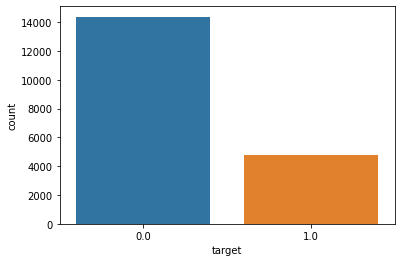

In [22]:
sns.countplot(all_data.target)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'How many among the target have relevant experience')

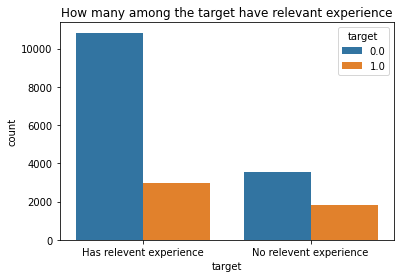

In [23]:
sns.countplot(all_data.relevent_experience,hue=all_data.target)
plt.xlabel('target')
plt.ylabel('count')
plt.title('How many among the target have relevant experience')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender-wise distribution of job seekers')

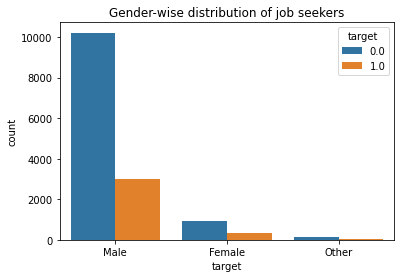

In [24]:
sns.countplot(all_data.gender,hue=all_data.target)
plt.xlabel('target')
plt.ylabel('count')
plt.title('Gender-wise distribution of job seekers')

In [25]:
all_data.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
all_data.replace(to_replace = 'No relevent experience',value='No',inplace = True )

all_data.replace(to_replace = '<1',value = '0',inplace = True)
all_data.replace(to_replace = '>20',value = '21',inplace=True)
all_data.replace(to_replace = 'never',value = '0',inplace=True)
all_data.replace(to_replace = '>4',value = '5',inplace=True)

all_data.replace(to_replace = '<10',value = 'around_10',inplace=True)
all_data.replace(to_replace = '10/49',value = 'around_50',inplace=True)
all_data.replace(to_replace = '50-99',value = 'around_100',inplace=True)
all_data.replace(to_replace = '100-500',value = 'around_500',inplace=True)
all_data.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
all_data.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
all_data.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
all_data.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

all_data.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
all_data.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

all_data.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
all_data.replace(to_replace = 'High School',value = 'High_School',inplace=True)

all_data.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
all_data.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

all_data.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
all_data.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
all_data.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
all_data.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

all_data['major_discipline'].replace('Other','Other_major',inplace=True)
all_data['company_type'].replace('Other','Other_type',inplace=True)


In [26]:
education_df = pd.get_dummies(all_data[['education_level']],drop_first=True,prefix=[None])
company_size_df = pd.get_dummies(all_data[['company_size']],drop_first=True,prefix=[None])
company_type_df = pd.get_dummies(all_data[['company_type']],drop_first=True,prefix=[None])
major_df = pd.get_dummies(all_data[['major_discipline']],drop_first=True,prefix=[None])
university_df = pd.get_dummies(all_data[['enrolled_university']],drop_first=True,prefix=[None])
experience_df = pd.get_dummies(all_data[['relevent_experience']],drop_first=True,prefix=[None])
gender_df = pd.get_dummies(all_data[['gender']],drop_first=True,prefix=[None])

In [27]:
# drop original columns
all_data.drop(['education_level','company_size','company_type','major_discipline','enrolled_university','relevent_experience','gender'],axis=1,inplace=True)

In [28]:
all_data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'experience',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [29]:
all_data.drop(['enrollee_id','city'],axis=1,inplace=True)

In [30]:
final_df = pd.concat([all_data,education_df,company_size_df,company_type_df,major_df,university_df,experience_df,gender_df],axis=1) 

In [31]:
final_df.columns

Index(['city_development_index', 'experience', 'last_new_job',
       'training_hours', 'target', 'High_School', 'Masters', 'Phd',
       'Primary_School', 'around_100', 'around_1000', 'around_10000',
       'around_50', 'around_500', 'around_5000', 'more_than_10000',
       'Funded_Startup', 'NGO', 'Other_type', 'Public_Sector', 'Pvt_Ltd',
       'Business_Degree', 'Humanities', 'No_Major', 'Other_major', 'STEM',
       'Part_time_course', 'no_enrollment', 'Yes', 'Male', 'Other'],
      dtype='object')

In [32]:
final_df.isna().any().sum()

3

In [33]:
final_df.head()

,city_development_index,experience,last_new_job,training_hours,target,High_School,Masters,Phd,Primary_School,around_100,...,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
0,0.920,21,1,36,1.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
1,0.776,15,5,47,0.0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,0.624,5,0,83,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.789,0,0,52,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.767,21,4,8,0.0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,1,0


In [34]:
final_df.shape

(21287, 31)

In [35]:
final_df.columns

Index(['city_development_index', 'experience', 'last_new_job',
       'training_hours', 'target', 'High_School', 'Masters', 'Phd',
       'Primary_School', 'around_100', 'around_1000', 'around_10000',
       'around_50', 'around_500', 'around_5000', 'more_than_10000',
       'Funded_Startup', 'NGO', 'Other_type', 'Public_Sector', 'Pvt_Ltd',
       'Business_Degree', 'Humanities', 'No_Major', 'Other_major', 'STEM',
       'Part_time_course', 'no_enrollment', 'Yes', 'Male', 'Other'],
      dtype='object')

In [36]:
X = final_df.drop(['target'], axis = 1)
Y = final_df['target']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

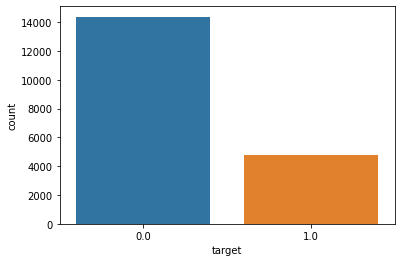

In [37]:
sns.countplot(final_df['target'])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2 ,random_state = 42)

In [39]:
# from xgboost import XGBClassifier
# clf = XGBClassifier(colsample_bytree= 0.8,
#  gamma= 1.5,
#  max_depth= 5,
#  min_child_weigh= 1,
#  subsample= 0.6)

# clf.fit(X_train, y_train)

In [40]:
# clf.score(X_train,y_train)